In [138]:
!pip install ipython-autotime

%load_ext cython

from datetime import datetime
import time

import matplotlib.pyplot as plot
from random import random
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The cython extension is already loaded. To reload it, use:
  %reload_ext cython
time: 2.83 s (started: 2022-06-26 16:33:01 +00:00)


# Решение линейных уравнений на чистом Python'е и при помощи Cython'a

In [110]:
def gen_matrix(length):
  return [[np.random.randint(1,10)  for a in range(length+1)] for b in range(length)]

time: 1.2 ms (started: 2022-06-26 16:27:04 +00:00)


In [121]:
m = gen_matrix(5)
m

[[7, 1, 6, 3, 9, 6],
 [6, 2, 2, 1, 2, 2],
 [9, 7, 1, 1, 5, 7],
 [1, 4, 1, 2, 7, 4],
 [1, 3, 9, 5, 6, 8]]

time: 6.19 ms (started: 2022-06-26 16:29:20 +00:00)


In [104]:
def python_gaus(m: list):
  n = len(m)
  ans = m
  for i in range(n):
    for j in range(n):
      k = m[j][i]/m[i][i]
      for t in range(i, n+1):
        if i==j: continue
        ans[j][t] = m[j][t] - k * m[i][t]
  return [m[i][-1]/m[i][i] for i in range(n)]

time: 3.52 ms (started: 2022-06-26 16:22:41 +00:00)


In [145]:
%%cython
import copy

def cy_gaus(m: list):
  s = datetime.now()
  a = copy.deepcopy(m)
  cdef int n = len(a)
  for i in range(n):
    for j in range(n):
      k = a[j][i]/a[i][i]
      for t in range(i, n+1):
        if i==j: continue
        a[j][t] = a[j][t] - k * a[i][t]
  ans = [a[i][-1]/a[i][i] for i in range(n)]
  return int(datetime.now()-s)

time: 24.3 ms (started: 2022-06-26 16:36:11 +00:00)



Error compiling Cython file:
------------------------------------------------------------
...
import copy

def cy_gaus(m: list):
  s = datetime.now()
     ^
------------------------------------------------------------

/root/.cache/ipython/cython/_cython_magic_e2748b424425efd15ad8d0ff5d6ee65a.pyx:4:6: undeclared name not builtin: datetime


In [125]:
m=[[1, 0.42, 0.54, 0.66, 0.3],\
   [0.42, 1, 0.32, 0.44, 0.5],\
   [0.54, 0.32, 1, 0.22, 0.7],\
   [0.66,0.44, 0.22, 1, 0.9]]

time: 1.42 ms (started: 2022-06-26 16:29:58 +00:00)


In [151]:
m = gen_matrix(100)

time: 38.4 ms (started: 2022-06-26 16:39:51 +00:00)


In [142]:
ans = python_gaus(m)


time: 117 ms (started: 2022-06-26 16:34:05 +00:00)


In [152]:
ans2 = cy_gaus(m)

time: 27.6 ms (started: 2022-06-26 16:40:02 +00:00)


In [162]:
def f(n):
  m = gen_matrix(n)
  s = time.time()
  ans2 = cy_gaus(m)
  a1 = time.time() - s
  s = time.time()
  ans2 = python_gaus(m)
  a2 = time.time() - s
  return [a1, a2]

time: 3.63 ms (started: 2022-06-26 16:50:47 +00:00)


In [199]:
x100 = list(range(10 , 100, 10))
x300= list(range(100 , 300, 30))
x600 = list(range(300 , 600, 50))
x1000 = list(range(600 , 1000, 100))
y1_100=[]; y2_100=[]
for i in x100:
  [a1, a2] = f(i)
  y1_100.append(a1)
  y2_100.append(a2)

time: 387 ms (started: 2022-06-26 17:09:09 +00:00)


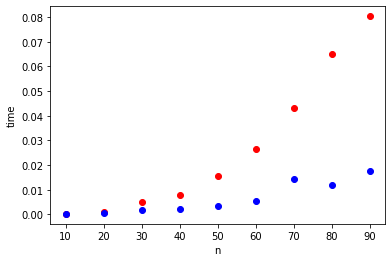

time: 144 ms (started: 2022-06-26 17:16:54 +00:00)


In [204]:
plt.plot(x100, y2_100, 'ro', x100, y1_100,  'bo')
plt.xlabel('n')
plt.ylabel('time')
plt.show()

In [200]:
y1_300=[]; y2_300=[]
for i in x300:
  [a1, a2] = f(i)
  y1_300.append(a1)
  y2_300.append(a2)

time: 9.29 s (started: 2022-06-26 17:09:19 +00:00)


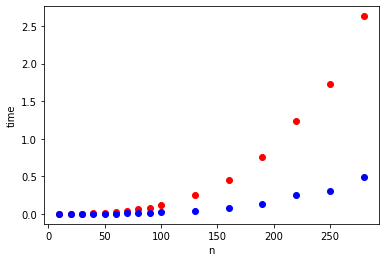

time: 130 ms (started: 2022-06-26 17:17:02 +00:00)


In [205]:
x=x100+x300
y2=y2_100+y2_300
y1=y1_100+y1_300
plt.plot(x, y2, 'ro', x, y1,  'bo')
plt.xlabel('n')
plt.ylabel('time')
plt.show()

In [201]:
y1_600=[]; y2_600=[]
for i in x600:
  [a1, a2] = f(i)
  y1_600.append(a1)
  y2_600.append(a2)

time: 1min 19s (started: 2022-06-26 17:09:39 +00:00)


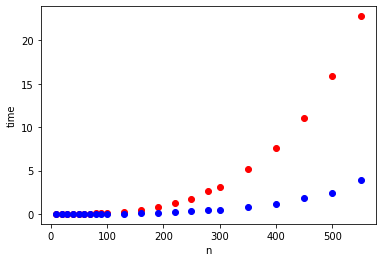

time: 122 ms (started: 2022-06-26 17:17:08 +00:00)


In [206]:
x=x100+x300+x600
y2=y2_100+y2_300+y2_600
y1=y1_100+y1_300+y1_600
plt.plot(x, y2, 'ro', x, y1,  'bo')
plt.xlabel('n')
plt.ylabel('time')
plt.show()

In [202]:
y1_1000=[]; y2_1000=[]
for i in x1000:
  [a1, a2] = f(i)
  y1_1000.append(a1)
  y2_1000.append(a2)

time: 4min 29s (started: 2022-06-26 17:10:59 +00:00)


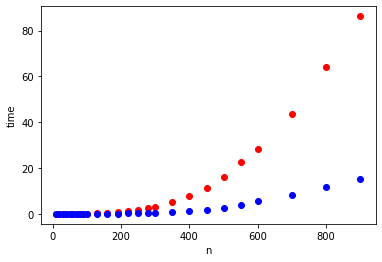

time: 128 ms (started: 2022-06-26 17:17:13 +00:00)


In [207]:
x=x100+x300+x600+x1000
y2=y2_100+y2_300+y2_600+y2_1000
y1=y1_100+y1_300+y1_600+y1_1000
plt.plot(x, y2, 'ro', x, y1,  'bo')
plt.xlabel('n')
plt.ylabel('time')
plt.show()

In [215]:
s=0
for i in range(len(y1)):
  s = s+y2[i]/y1[i]
s/len(y1)

4.993981730910652

time: 3.62 ms (started: 2022-06-26 17:22:19 +00:00)


time: 1.19 ms (started: 2022-06-26 16:53:22 +00:00)


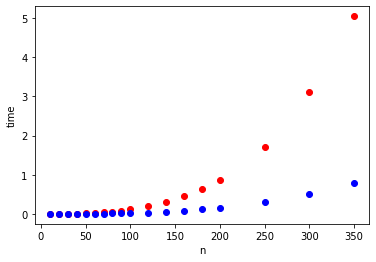

time: 147 ms (started: 2022-06-26 17:02:19 +00:00)


In [193]:
plt.plot(x, y2, 'ro', x, y1,  'bo')
plt.xlabel('n')
plt.ylabel('time')
plt.show()